In [1]:
import pandas as pd 
DATASET = "amazon_reviews_us_Grocery_v1_00.tsv"
import logging
import warnings
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
logging.disable(sys.maxsize)



In [2]:
dataset = pd.read_table(DATASET, error_bad_lines=False, header=0, warn_bad_lines=False) 
# there are some malformed entries the dataset... let's ignore those for now


In [3]:
### Let's see what the dataset looks like... 
dataset.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,42521656,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31
1,US,12049833,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31
2,US,107642,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31
3,US,6042304,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31
4,US,18123821,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5,0.0,0.0,N,Y,Five Stars,good,2015-08-31


In [4]:
#lots of nan values... :( 
dataset.isnull().sum()

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating          22
helpful_votes        23
total_votes          23
vine                 23
verified_purchase    23
review_headline      34
review_body          88
review_date          65
dtype: int64

In [5]:
# Lots of spammy duplicate reviews...might be worth checking if the same person is duplicating the reviews across multiple products


x = dataset[dataset['review_body'].duplicated() == True]
x.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
130,US,21294263,R3KT8X23DG3WCI,B00ZPV2070,22340539,Wolfgang Puck Coffee Keurig K-Cups - Vanilla F...,Grocery,5,0.0,0.0,N,Y,Great coffee,Delicious,2015-08-31
186,US,41355087,R8AE9OXZMTORH,B00KDW19WS,76193812,Nagaraya Cracker Nuts Assorted Bundle 4-Pack: ...,Grocery,5,0.0,0.0,N,Y,Five Stars,Yummy,2015-08-31
208,US,51044872,R3QZBU3F214CF1,B00N2FVHWU,928026267,Green Mountain Coffee Wicked Winter Blend Keur...,Grocery,5,1.0,1.0,N,Y,Five Stars,Great coffee,2015-08-31
270,US,48880662,RRRDCQSQ66LE,B008TMIO2M,81982020,"Nutella, Hazelnut Spread with Cocoa",Grocery,4,0.0,0.0,N,Y,Four Stars,good,2015-08-31
273,US,14100648,RGH9G1J3M0ZW6,B005P0U5BO,936604878,Envirokidz Organic Bar Gf Crspyrice Brry Org,Grocery,5,0.0,0.0,N,Y,GREAT! Thanks So much and God bless,GREAT! Thanks So much and God bless! &#60;&#...,2015-08-31


In [6]:
#remove NaNs from the dataset  for now...
dataset = dataset.dropna()

In [7]:

def filter_heuristic(row):
    '''
    determine if a row is a negative review based on its score. Potentially extend it to include sentiment analysis 
    and presence of specific negative words 
    '''
    return row["star_rating"].astype(int) <=3

In [8]:
negative_rows = dataset.loc[filter_heuristic]
negative_rows.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
5,US,23649464,RIG9AWFOGRDVO,B00AL6QBZ6,681475449,Herr's Popcorn Hot Cheese 1 Oz (Pack of 30),Grocery,2,1.0,1.0,N,Y,Not Happy,The popcorn was stale.,2015-08-31
9,US,19624355,R1ODXB3C9UP3NL,B00J074W94,2499702,"Orgain Organic Plant Based Protein Powder, Pac...",Grocery,1,1.0,3.0,N,N,Disgusting now and difficult on digestion,Used to be a decent product. Disgusting now a...,2015-08-31
17,US,22765168,R3T6TTD2IN0EFZ,B00XDXMLL2,971154239,"Skippy Creamy Peanut Butter, with Salted Caram...",Grocery,1,4.0,4.0,N,N,"1 Out Of 5 Of My Co-Workers Thought It Was ""Okay""",I bought this from a local super market on a w...,2015-08-31
23,US,35636887,R9MISLBRG08FX,B00DBSFXUA,294404974,"Keebler Town House Pita Crackers, 9.5 Ounce",Grocery,1,0.0,0.0,N,Y,pita crackers,not craze about these. nothing really wrong wi...,2015-08-31
26,US,12650237,R2A9O8CWZ1PP74,B0083GJKR2,868929824,"Eclipse Sugar Free Gum, Spearmint, 120 Piece B...",Grocery,3,0.0,0.0,N,Y,Three Stars,it's gum..,2015-08-31


In [9]:
sorted_negative_rows = negative_rows.sort_values("product_id")

In [10]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',
                          collocations=False, stopwords = STOPWORDS).generate(text)
    plt.imshow(wordcloud)

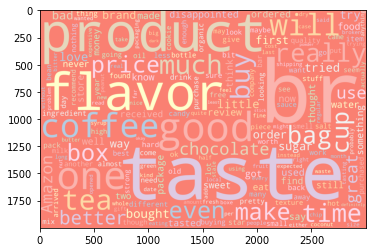

In [11]:
generate_wordcloud(" ".join(sorted_negative_rows["review_body"]))